In [1]:
import numpy as np
import sys
sys.path.append('..')
from data.smoothing import smooth_pend
from data.pendulum import pendulum_train_data, pendulum_test_data
from utils.normalize import normalize_pend
from data.pde_recovery import sample_idxs, load_and_shift_pend_data, optimal_recovery, rbf_vector_kernel, cross_validation, rhs, mse_loss, cross_validation_lengthscale, cross_validation_nugget
from scipy.linalg import cho_factor, cho_solve
import matplotlib.pyplot as plt

In [20]:
# Perform the PDE learning step for the pendulum data

I = 40  # Number of pendulums we're running
results, f = pendulum_train_data(I=I, noise=0.1)
test_results, f_test = pendulum_test_data(I=50, noise=0.1)

t = np.linspace(0,1,1000)
normalized_train_results, normalized_train_f, scalers = normalize_pend(results, f)
normalized_test_results, normalized_test_f, test_scalers = normalize_pend(test_results, f_test)

sample = sample_idxs()
S_train, f_train, t_train = load_and_shift_pend_data(normalized_train_results, normalized_train_f, sample, 15, .0001, kernel='poly')
S_test, f_test, t_test = load_and_shift_pend_data(normalized_test_results, normalized_test_f, sample, 15, .0001, kernel='poly')

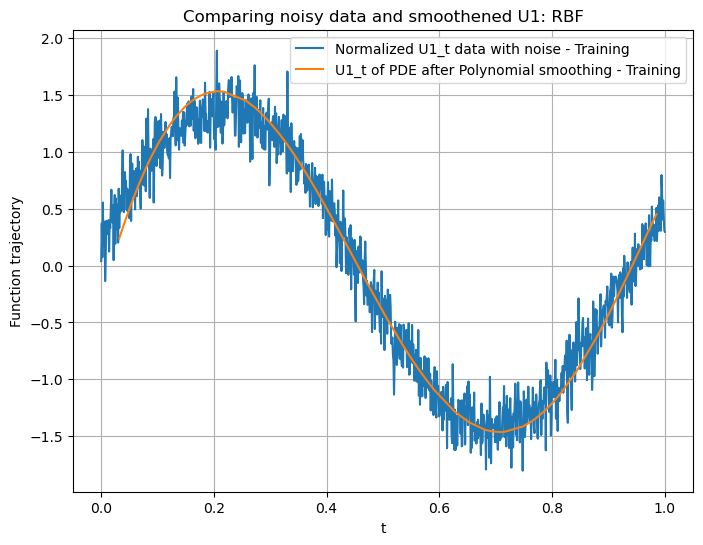

In [21]:
# Perform the PDE learning step for the pendulum data
plt.figure(figsize=(8, 6))

plt.plot(t, normalized_train_results[2, 1, :].T) # u1_t
plt.plot(t_train, S_train[1, :, 0, 2].T)
plt.xlabel('t')
plt.ylabel('Function trajectory')
plt.title('Comparing noisy data and smoothened U1: RBF')
plt.grid(True)
plt.xlabel('t')
plt.legend(['Normalized U1_t data with noise - Training', 'U1_t of PDE after Polynomial smoothing - Training'])
plt.grid(True)
plt.show()

In [14]:
# Perform the PDE learning step for the pendulum data

I = 40  # Number of pendulums we're running
results, f = pendulum_train_data(I=I, noise=0.1)
test_results, f_test = pendulum_test_data(I=50, noise=0.1)

t = np.linspace(0,1,1000)
normalized_train_results, normalized_train_f, scalers = normalize_pend(results, f)
normalized_test_results, normalized_test_f, test_scalers = normalize_pend(test_results, f_test)

sample = sample_idxs()
S_train, f_train, t_train = load_and_shift_pend_data(normalized_train_results, normalized_train_f, sample, .1, .0001, kernel='rbf')
S_test, f_test, t_test = load_and_shift_pend_data(normalized_test_results, normalized_test_f, sample,  .1, .0001, kernel='rbf')

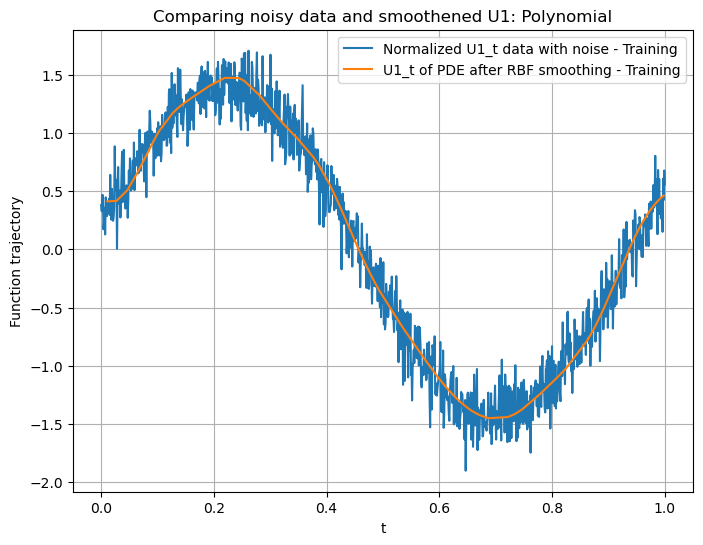

In [19]:
# Perform the PDE learning step for the pendulum data
plt.figure(figsize=(8, 6))

plt.plot(t, normalized_train_results[2, 1, :].T) # u1_t
plt.plot(t_train, S_train[1, :, 0, 2].T)
plt.xlabel('t')
plt.ylabel('Function trajectory')
plt.title('Comparing noisy data and smoothened U1: Polynomial')
plt.grid(True)
plt.xlabel('t')
plt.legend(['Normalized U1_t data with noise - Training', 'U1_t of PDE after RBF smoothing - Training'])
plt.grid(True)
plt.show()